**Exploratory Data Analysis (EDA)**

While learning data science, Exploratory Data Analysis is the topic that you will encounter and also follow it but without exactly being aware of it(EDA). Exploratory Data Analysis, as its name suggest it is the technique of manipulating dataset, playing with it in right way, understand the dataset, represent the understandings, and modeling and implementing algorithms in order to understand the behavior of the data. 

This definition seems like EDA and data mining/analysis are the same thing. But first, let me give you a list of tasks you do while data analysis/mining.

1.   Data requirements
2.   Data collection
3.   Data processing
4.   Data cleaning
5.   EDA
6.   Modeling and algorithm
7.   Data Product
8.   Communication

In step 5 which is EDA, we prepare the data for actual analysis. We select the relevant data from the overall dataset, delete non-relevant datasets, transform the data, and divide the data into required chunks for analysis. And then we work on the most crucial steps that deal with descriptive statistics. Here we summarize the data, finding the hidden correlation and relationships among the data. Then we can visualize these correlation and regression relationships using different visualizing tools. Next, we work more on understanding the behavior of data by developing predictive models, evaluating the models, and calculating the accuracies. Here are four stages of EDA that I just explained about:

1.   Problem definition
2.   Data preparation
3.   Data analysis
4.   Development and representation of the results

While working on EDA we must recognize different facts in our datasets like data type and measurement scales, because they make a difference in results we assume after analyzing a dataset. A dataset contains many observations(columns) about a particular object. These observations might be numerical data or categorical data. Even in numerical they could be discrete data or continuous data. In the case of measurement scale, it could be nominal, ordinal, interval, and ratio.



**Getting started with EDA**

We are going to use Python as the main tool for data analysis. Python has been consistently ranked among the top 10 programming languages and is widely adopted for data analysis and data mining by data science experts. Here I assume you have a working knowledge of Python. I assume you are familiar with the following Python tools and packages:

NumPy:
* Create arrays with NumPy, copy arrays, and divide arrays 
*  Perform different operations on NumPy arrays 
*  Understand array selections, advanced indexing, and expanding 
*  Working with multi-dimensional arrays 
*  Linear algebraic functions and built-in NumPy functions

Pandas:
* Understand and create DataFrame objects
*  Subsetting data and indexing data 
*  Arithmetic functions, and mapping with pandas
*  Managing index
*  Building style for visual analysis

Matplotlib:
*  Loading linear datasets
*  Adjusting axes, grids, labels, titles, and legends 
*  Saving plots

SciPy:
*  Importing the package
*   Using statistical packages from SciPy
*  Performing descriptive statistics
*  Inference and data analysis

Now I will load a well known and easily available dataset "Automobile dataset".You can download this automobile dataset from kaggale. And then follow the EDA process to get some meaningful insights from the dataset. 

**import libraries**



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#setting default visualization parameters
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

**Load dataset**

In [0]:
# loading data set as Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/ashagaire/EDA/master/Automobile_data1.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Understanding dataset**

In [0]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Data Cleaning**

Find out the columns which have eampty cells.

Let's clean each column with absent values one by one.

Find out the number of values which are not numeric in price columns.

In [0]:
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

List out the values which are not numeric

In [0]:
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

Setting the missing value to mean of price and convert the datatype to integer

In [0]:
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0    13495
1    16500
2    16500
3    13950
4    17450
5    15250
6    17710
7    18920
8    23875
9    13207
Name: price, dtype: int64

In [0]:
pmean

13207.126829268293

Cleaning the horsepower losses column

In [0]:
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

Cleaning the Normalized losses column

In [0]:
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int64

Now let's see some statical analysis from prepared dataset.

Initially the price, horsepower and normalized losses column were object type and now after data cleaning they are intiger type.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [0]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.0000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,130.4000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.253659,25.219512,30.751220,13207.126829
std,1.245307,35.8791,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.519219,6.542142,6.886443,7868.768212
min,-2.000000,65.0000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.0000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,128.0000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,164.0000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.0000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


Now computing the Measure of central tendency of the values in column height.  Taking only a single column of the data set for analysis is called a univariate analysis.

In [0]:
#calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.724878048780525 54.1 0    50.8
dtype: float64


Now let's visualize this analysis in graph.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


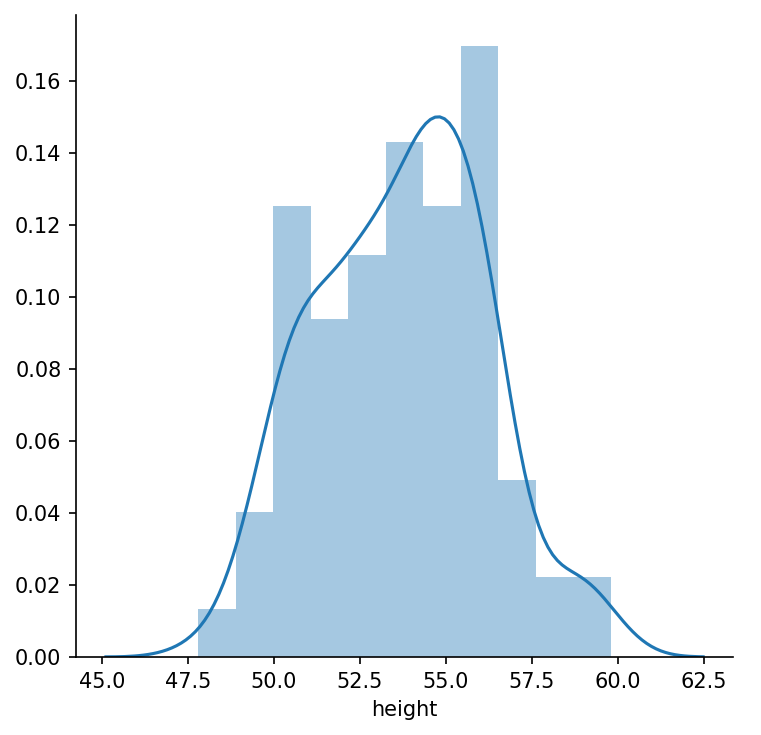

In [0]:
#distribution plot
sns.FacetGrid(df,size=5).map(sns.distplot,"height").add_legend()

Taking  two columns of the data set for analysis is called a bivariate analysis.

Text(0, 0.5, 'price')

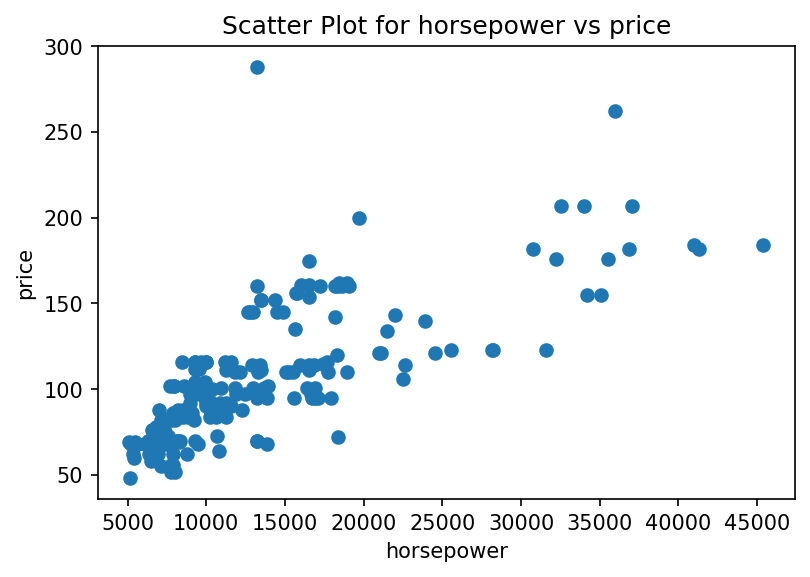

In [0]:

# plot the relationship between “horsepower” and ”price”
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

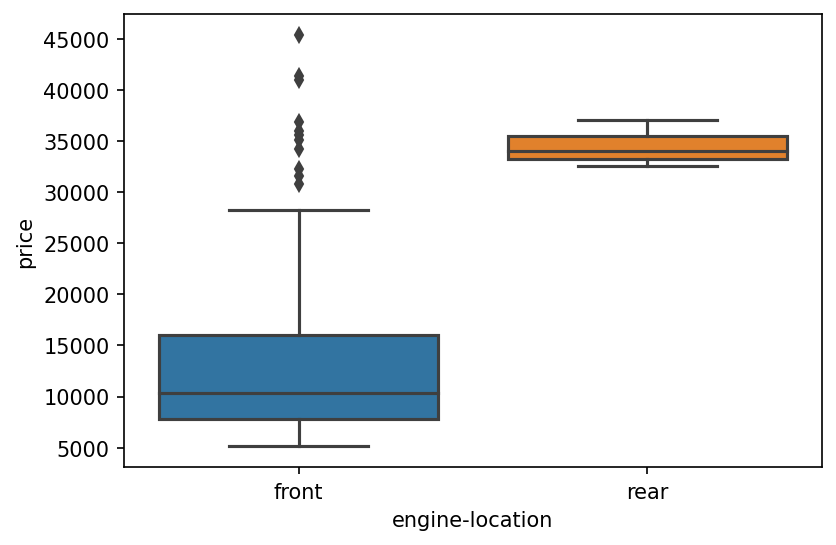

In [0]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

Taking more than two columns of the data set for analysis is called a multivariate analysis.

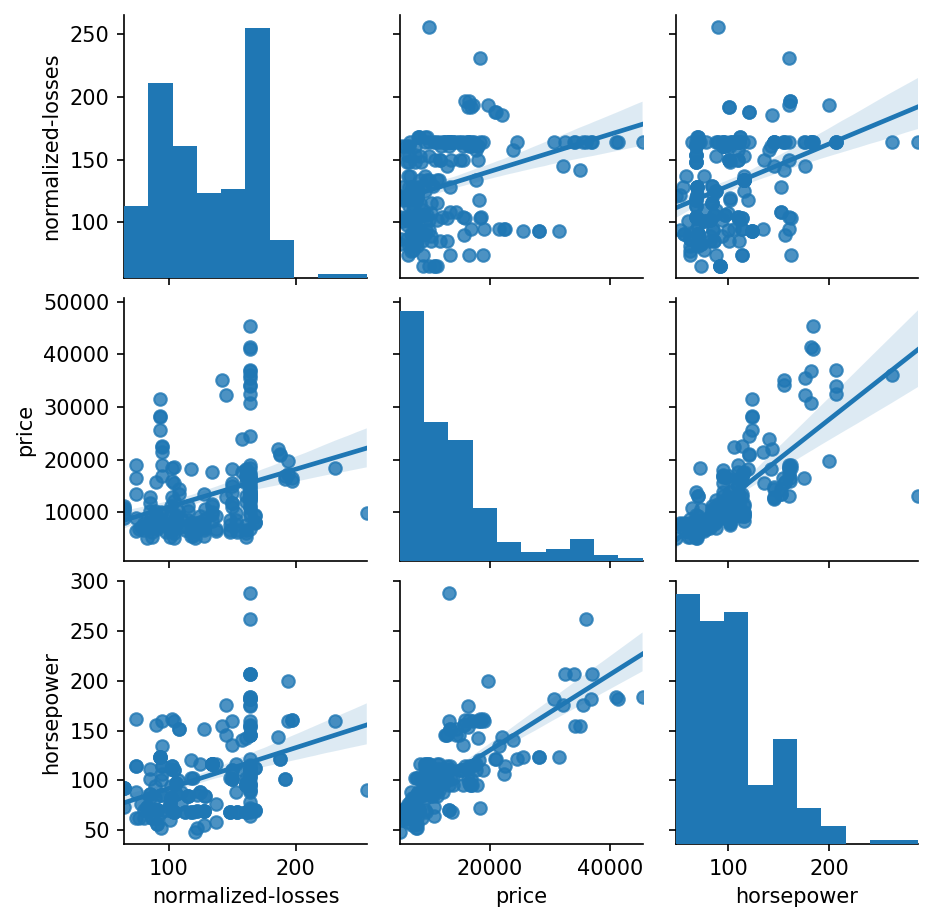

In [0]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  kind="reg")
plt.show()

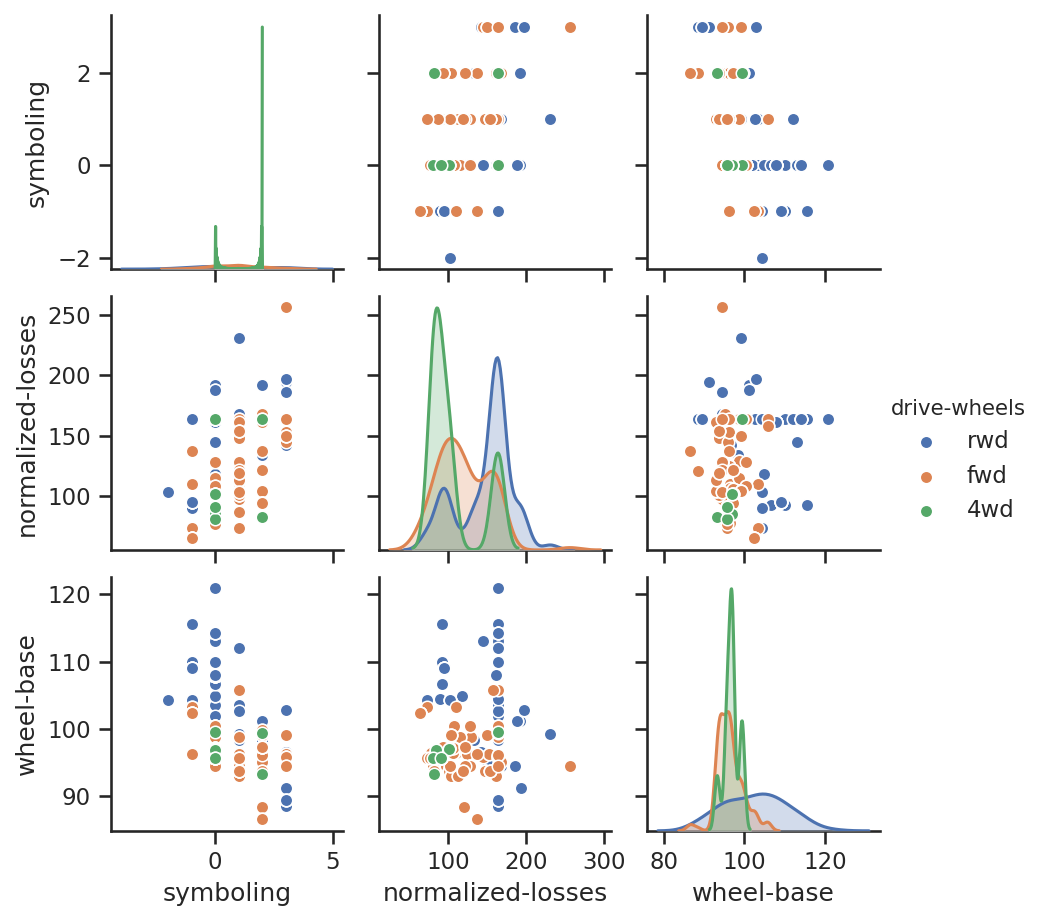

In [0]:
#pair plot (matrix scatterplot) of few columns 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()


Correlation will represenr which feature of datadet are independent and which are dependent.Using pandas corr() function correlation between entire numerical record can be calculated.

In [0]:
correlation = df.corr(method='pearson')
correlation


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


Now let's visualize this correlation analysis of this dataset with heatmap. Heatmap is best technique to make it look beautiful and easier to interpret.

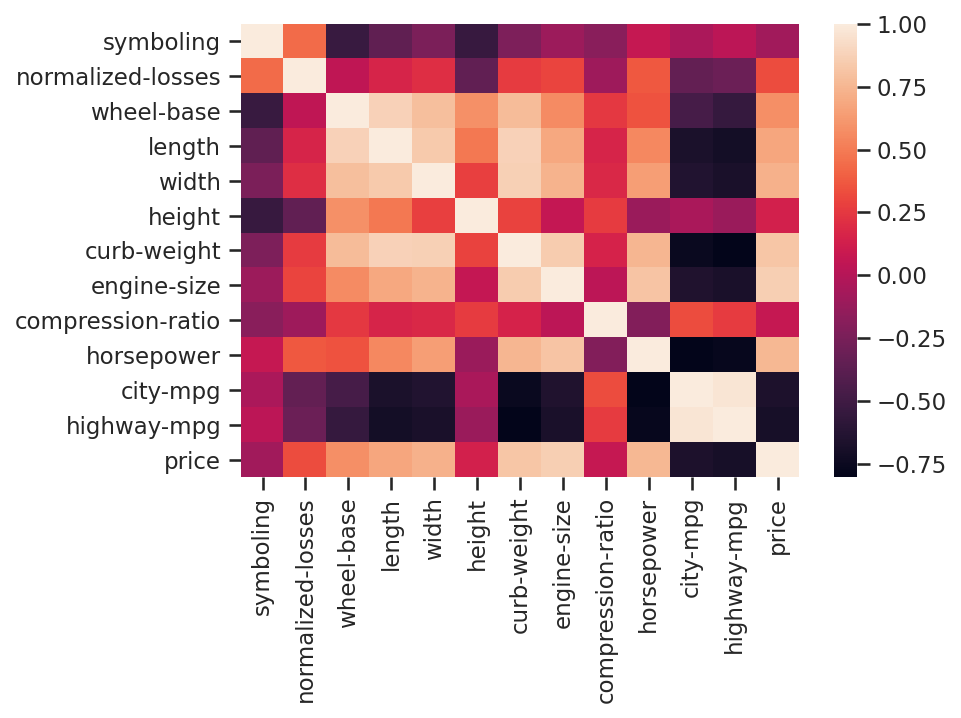

In [0]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns)


A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.